# 1 Getting basic statistics over raw count files

Cynthia Soto <br>
Date: March 17th 2021<br>
Last md: March 23th 2021 <br>

**Assumptions:** <br>
You want to explore your data before perform functions over the data. <br>
Data are expression RNASeq raw counts.e.g: files generated with HTSeq tool <br>
**This is a custom script to get the general statistics over a subset of files with raw counts (Arabidopsis (Col-0) Healthy and Infected)** <br>

***Workflow:***<br>
1) Compouse a expression matrix<br>
2) Get some basic statics & the number of genes in zeros.<br>

In [1]:
import pandas as pd
import numpy as np
import os 
import glob

# Set some initial configuration 
pd.set_option("display.precision", 3)

In [6]:
#  @dir_to_parse        Set the folder to be parse (the raw count must to be there)
#  @general_titles      This var is used to label the plots and save the temporary files. 

###   Here I am retrieving the healthy datasets
#dir_to_parse='athal1_htseq-counts/'
#general_titles="healthy"

###   Here I am retrieving the infected datasets
dir_to_parse='athal3_htseq-counts/'
general_titles=" infected "

try:
    # Change the current working Directory to the quantification dir
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/"+dir_to_parse)
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")
s_path=os.getcwd()
print(s_path)

Directory changed
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal3_htseq-counts


In [5]:
#print(os.listdir(os.getcwd()) # list all the files in Dir
for file in glob.glob("SRR*"):
    print(file)

SRR6283147
SRR3383696
SRR364398
SRR364391
SRR364389
SRR364390
SRR6283146
SRR364392
SRR3383697
SRR10586399
SRR3383779
SRR364399
SRR364400
SRR3383780
SRR10586397
SRR6283148
SRR364401


### Adjust raw count files to get some stats
<ol>
<li>Remove lines that are not of interest</li>
<li>Get the basic stats about each sample</li>
<li>Get some additional stats: eg. number of zeros by sample</li>
</ol>

In [7]:
## Take each file and drop the last n rows (refering to the statistics of HTSeq) that are not counts.
## 1) Take in account that rows with statistic (last ones) produced by the quantification tool in each file will be removed to avoid error
## this need to be adjust depending the quantification tool.

## 2) It is assumed that files contains just "Genes and Counts"

for file in glob.glob("SRR*"):
    print(file)
    df= pd.read_csv(file, sep='\t', header=None)
    try:
        # Add column-names
        df.columns = ["Genes","Counts"]
        print(df.head(2))      
        df.drop(df.tail(5).index,inplace=True) # drop last n rows (refering statistics of HTSeq)
        #print(df.tail(5))       
        ## check genes in zeros across 
        genes_in_cero = df.isin([0]).sum()
        print("Genes in zeros:",genes_in_cero['Counts'])
        ## CREATE NEW file with basic statistics *_stats.csv
        df_stats=df.describe()
        #print(df_stats.columns)
        df_stats.loc['Zeros'] = [genes_in_cero['Counts']]      # adding a row
        df_stats.loc['sample'] = [file]                        # adding a row
        print(df_stats)            # print(df_stats.columns)
        df_stats.to_csv('../results-data/statistics/tmp/'+str(file)+'_raw_'+ general_titles +'_stats.csv', sep='\t')
    except:
        pass # doing nothing on exception, not processed because it is already pre-processed"

SRR6283147
       Genes  Counts
0  AT1G01010      48
1  AT1G01020      40
Genes in zeros: 10600
            Counts
count     2.77e+04
mean           220
std       1.79e+03
min              0
25%              0
50%              3
75%             50
max       1.14e+05
Zeros     1.06e+04
sample  SRR6283147
SRR3383696
       Genes  Counts
0  AT1G01010      92
1  AT1G01020     141
Genes in zeros: 7518
            Counts
count     2.77e+04
mean           399
std        2.2e+03
min              0
25%              0
50%             57
75%            315
max       1.97e+05
Zeros     7.52e+03
sample  SRR3383696
SRR364398
       Genes  Counts
0  AT1G01010     122
1  AT1G01020     123
Genes in zeros: 7117
           Counts
count    2.77e+04
mean          316
std       1.4e+03
min             0
25%             0
50%            38
75%           229
max      7.16e+04
Zeros    7.12e+03
sample  SRR364398
SRR364391
       Genes  Counts
0  AT1G01010     147
1  AT1G01020     184
Genes in zeros: 7185
     

### Here all statistic files (previously generated) will be integrated in one file to plot it later

In [8]:
# if you want to check the files to be processed before to run the code
for file in glob.glob('../results-data/statistics/tmp/*_raw_'+ general_titles +'_stats.csv'):
    print(file)

../results-data/statistics/tmp/SRR364390_raw_ infected _stats.csv
../results-data/statistics/tmp/SRR3383780_raw_ infected _stats.csv
../results-data/statistics/tmp/SRR364399_raw_ infected _stats.csv
../results-data/statistics/tmp/SRR3383696_raw_ infected _stats.csv
../results-data/statistics/tmp/SRR364392_raw_ infected _stats.csv
../results-data/statistics/tmp/SRR3383779_raw_ infected _stats.csv
../results-data/statistics/tmp/SRR364400_raw_ infected _stats.csv
../results-data/statistics/tmp/SRR6283147_raw_ infected _stats.csv
../results-data/statistics/tmp/SRR10586397_raw_ infected _stats.csv
../results-data/statistics/tmp/SRR364389_raw_ infected _stats.csv
../results-data/statistics/tmp/SRR10586399_raw_ infected _stats.csv
../results-data/statistics/tmp/SRR364401_raw_ infected _stats.csv
../results-data/statistics/tmp/SRR6283146_raw_ infected _stats.csv
../results-data/statistics/tmp/SRR364391_raw_ infected _stats.csv
../results-data/statistics/tmp/SRR364398_raw_ infected _stats.csv
.

In [9]:
bfirst_file=True
for file in glob.glob('../results-data/statistics/tmp/*_raw_'+ general_titles +'_stats.csv'):
    #print(file)
    df_tmp=pd.read_csv(file, sep='\t', header=None, index_col=False)
    #print(df_tmp)
    # transpose df
    df = df_tmp.T
    # drop index 0 (somelike headers) -- rows
    df.drop(df.index[:1], inplace=True)
    if bfirst_file==True:
        df_all=df
        bfirst_file=False
        #print(df_all)
    else:
        df_all=df_all.append(df)
        #print(df_all)
        pass
    
#print(df_all)

In [10]:
#df_all
# set column's names to apply filters by name
df_all.columns = ['Metric','count','mean','std','min','25%','50%','75%','max','Zeros','sample']
df_all
#df_all.set_index('sample', inplace=True)
df_all.reset_index()
print(df_all.index)
df_all.head(5)

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype='int64')


,Metric,count,mean,std,min,25%,50%,75%,max,Zeros,sample
1,Counts,27655.0,324.6518531911047,1484.6011426997072,0.0,0.0,54.0,286.5,149420.0,7229.0,SRR364390
1,Counts,27655.0,416.244946664256,1962.7059462937416,0.0,0.0,55.0,335.0,165685.0,7549.0,SRR3383780
1,Counts,27655.0,316.0595913939613,1399.119762356361,0.0,0.0,38.0,230.5,71327.0,7090.0,SRR364399
1,Counts,27655.0,399.4826613632255,2197.554509464289,0.0,0.0,57.0,315.0,196583.0,7518.0,SRR3383696
1,Counts,27655.0,324.25875971795335,1348.8402693920711,0.0,0.0,58.0,296.0,110046.0,7219.0,SRR364392


In [11]:
# select and format the measures to be plotted
df_all[['mean','std','25%','50%','75%','max','Zeros']] = df_all[['mean','std','25%','50%','75%','max','Zeros']].apply(pd.to_numeric)
# apply decimals 
df_all = df_all.filter(['sample','mean','std','25%','50%','75%','max','Zeros']).round(decimals=3)
#print(df_plot.dtypes)
print(df_all.index)

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype='int64')


In [12]:
df_plot = df_all
#print(df_plot.index)
df_plot.head(5)

,sample,mean,std,25%,50%,75%,max,Zeros
1,SRR364390,324.652,1484.601,0.0,54.0,286.5,149420.0,7229.0
1,SRR3383780,416.245,1962.706,0.0,55.0,335.0,165685.0,7549.0
1,SRR364399,316.060,1399.120,0.0,38.0,230.5,71327.0,7090.0
1,SRR3383696,399.483,2197.555,0.0,57.0,315.0,196583.0,7518.0
1,SRR364392,324.259,1348.840,0.0,58.0,296.0,110046.0,7219.0



###  Adding labels for plotting (leyends)


In [13]:
file='../meta-data/ID_samples.csv'
df_meta=pd.read_csv(file, sep='\,', engine='python', usecols=[0,1]) 
print(df_meta.index)
df_meta.head(5)

RangeIndex(start=0, stop=25, step=1)


,sample,ID
0,SRR3383696,Bc12
1,SRR3383697,Bc12.1
2,SRR3383780,Bc18
3,SRR3383779,Bc18.1
4,SRR10586397,Bc24


In [14]:
#df_meta.reset_index()
df_meta.set_index("sample", inplace=True)
df_meta.reset_index()

,sample,ID
0,SRR3383696,Bc12
1,SRR3383697,Bc12.1
2,SRR3383780,Bc18
3,SRR3383779,Bc18.1
4,SRR10586397,Bc24
5,SRR10586399,Bc24.1
6,SRR364390,Ch22
7,SRR364389,Ch22.1
8,SRR364391,Ch22.2
9,SRR364392,Ch22.3


### Merge the df(s) to plot some stats about it with the sample names acurrate labeled

In [15]:
#merged_df = pd.merge(df_plot, df_meta, on="sample")
merged_df = pd.merge(df_plot, df_meta, left_on='sample', right_on='sample')

In [16]:
merged_df
merged_df.to_csv('../results-data/statistics/all_raw_' + general_titles + '_stats_zeros.csv', sep='\t', header=True, index=None)

### Get and sort specific column of interest 

In [17]:
## Ex: zeros field 
df_tmp= merged_df.sort_values('ID')
#df_tmp
col_ceros = df_tmp['Zeros'].tolist()
col_ceros.sort(reverse=False)
print(col_ceros)
#newlst

[5627.0, 5703.0, 7011.0, 7053.0, 7090.0, 7117.0, 7164.0, 7185.0, 7219.0, 7229.0, 7375.0, 7518.0, 7549.0, 7719.0, 9657.0, 10600.0, 10866.0]


### Plot some metrics of interest 

In [18]:
import matplotlib.pyplot as plt
## if you wish to consult available styles
#plt.style.available[:30]    
# 'Solarize_Light2','_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale',  'seaborn'

In [19]:
plt.style.use('seaborn-white')    # classic
# kind : str

#         ‘line’ : line plot (default)
#         ‘bar’ : vertical bar plot
#         ‘barh’ : horizontal bar plot
#         ‘hist’ : histogram
#         ‘box’ : boxplot
#         ‘kde’ : Kernel Density Estimation plot
#         ‘density’ : same as ‘kde’
#         ‘area’ : area plot
#         ‘pie’ : pie plot
#         ‘scatter’ : scatter plot
#         ‘hexbin’ : hexbin plot

<AxesSubplot:>

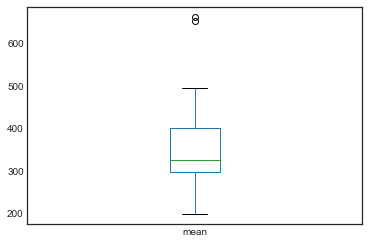

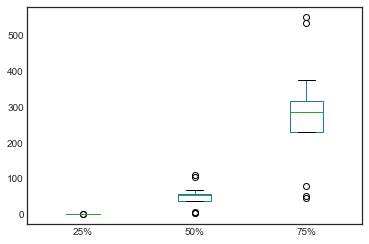

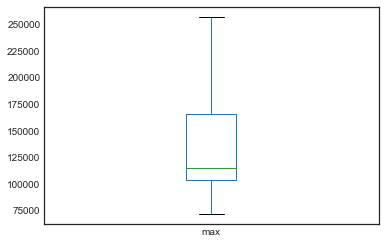

In [20]:
#merged_df.plot(x='ID', y=['mean','std'], kind='box') 
merged_df.plot(x='ID', y=['mean'], kind='box') 
merged_df.plot(x='ID', y=['25%','50%','75%'], kind='box') 
merged_df.plot(x='ID', y=['max'], kind='box') 

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


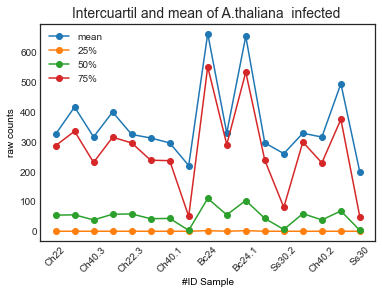

<Figure size 432x288 with 0 Axes>

In [22]:
## be careful to assure your metrics can be plotted in the same dimensions
## Ex: zero field is out of range respecting the other measures
merged_df.plot(x='ID', y=['mean','25%','50%','75%'], kind='line',marker='o')   #marker='o'
plt.xlabel('#ID Sample',color='black')
plt.xticks(rotation=45)
plt.ylabel('raw counts',color='black')
plt.title('Intercuartil and mean of A.thaliana ' + general_titles, fontsize=14)
plt.legend(loc=0)
plt.show()
plt.savefig('../results-data/statistics/athal_' + general_titles + '_raw_stats.png')

### Plot the number of genes with zero count by sample

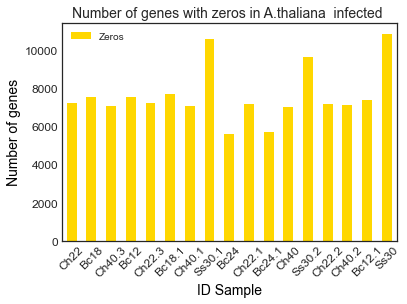

In [24]:
# More plots
merged_df.plot(x='ID', y='Zeros', kind='bar', color='gold',fontsize=12)
plt.xlabel('ID Sample',color='black',fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Number of genes',color='black',fontsize=14)
plt.title('Number of genes with zeros in A.thaliana ' + general_titles, fontsize=14)
#plt.legend(loc=1)

## add arbitrary lines to canvas
#plt.plot([0, 7], [7702, 7702], 'k-', lw=2, color='red',marker = 'o')
#plt.plot([0, 7], [5228, 5228], 'k-', lw=2, color='blue',marker = 'o')
#plt.text(0, 7200, "7702 top of zeros", fontsize=14)
#plt.text(0, 4700, "5228 across all samples", fontsize=14)

plt.show()
#plt.savefig("all_infected_num_zeros.png")